In [13]:
from MD_functions import *
import matplotlib.pyplot as plt
from scipy import special
import math
from scipy.constants import hbar, Boltzmann, Avogadro
from scipy.optimize import minimize_scalar

results_folder = r"C:\Users\yaniv\Yehonathan TAU\Lammps file"

# Harmonic Oscillator

## Energy

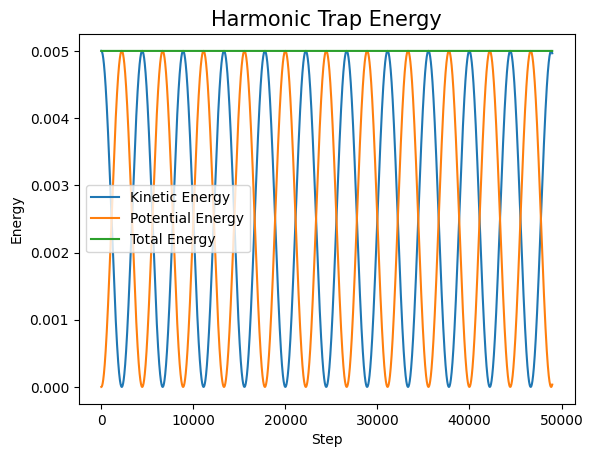

In [2]:
log_file = os.path.join(results_folder,"log_harmonic.lammps") #r'MD\Lammps file\log_harmonic.lammps'

harm_erg_df = read_log(log_file)
# display(harm_erg_df)
kinetic_erg, potential_erg, total_erg, steps = harm_erg_df['ke'], harm_erg_df['pe'], harm_erg_df['etotal'], harm_erg_df['Step']
end = 4900
plt.plot(steps[:end], kinetic_erg[:end], label='Kinetic Energy')
plt.plot(steps[:end], potential_erg[:end], label='Potential Energy')
plt.plot(steps[:end], total_erg[:end], label='Total Energy')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.legend()
plt.title('Harmonic Trap Energy', fontsize=15)
plt.show()

## Position

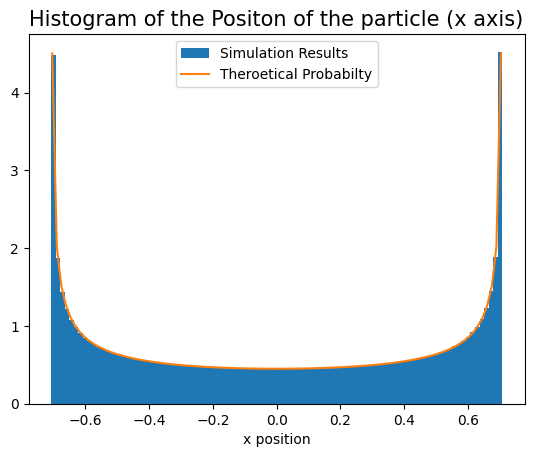

In [3]:
pos_file = os.path.join(results_folder,"dump_output_harmonic_big.lammpstrj")
harm_pos_df = read_lammpstrj(pos_file)
x = harm_pos_df['x']
steps = harm_pos_df['Timestep']
k = 0.02
mass = 1.0
v0 = 0.1
end = 500
# plt.plot(steps[:end], x[:end], label='Potential Energy')
# plt.xlabel('Step')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()
# print(max(x), min(x))

plt.hist(x, bins=100,density=True, label= 'Simulation Results') # x in angstram
x_max = np.sqrt(mass / k) * v0
x_show = np.linspace(-x_max*0.995,x_max * 0.995,100)
y = 1 / (np.pi * np.sqrt(x_max**2 - x_show ** 2))
plt.plot(x_show, y, label = 'Theroetical Probabilty')
plt.legend(loc ='best')
plt.title('Histogram of the Positon of the particle (x axis)', fontsize=15)
plt.xlabel(r'x position')
plt.show()

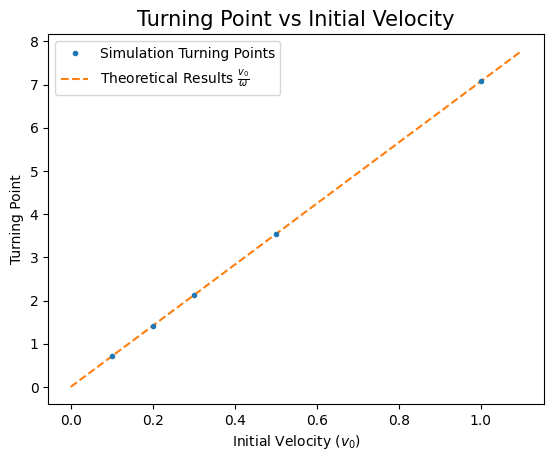

In [104]:
v_list = [0.1,0.2,0.3,0.5,1]
turning_points = []
x_turning_theo = np.sqrt(mass / k) * v0

for v0 in v_list:
    file_path = os.path.join(results_folder,"dump_output_harmonic_v0_{}.lammpstrj".format(v0))
    harm_pos_df = read_lammpstrj(file_path)
    x = harm_pos_df['x']
    x_turning_mes = (max(x) - min(x)) / 2 #turning point
    turning_points.append(x_turning_mes)

plt.plot(v_list, turning_points,'.', label='Simulation Turning Points')
plt.plot(np.array([0,1.1]),  np.sqrt(mass / k) * np.array([0,1.1]),'--', label=r'Theoretical Results $\frac{v_0}{\omega}$', zorder = 0)
plt.xlabel(r'Initial Velocity ($v_0$)')
plt.ylabel(r'Turning Point')
plt.legend()
plt.title('Turning Point vs Initial Velocity', fontsize=15)
plt.show()

## Quantum Harmonic Oscillator

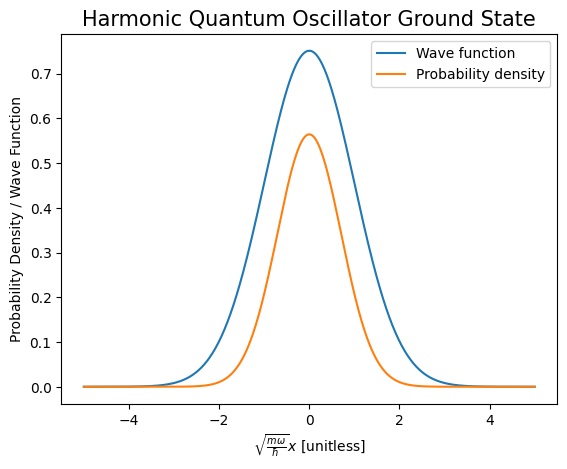

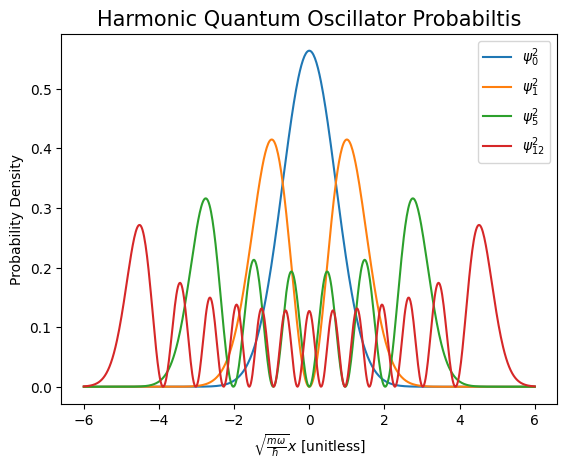

In [105]:
hermite_0 = special.hermite(1, monic=True)
psi_n = lambda x,n: (np.sqrt(np.pi) * 2**n * math.factorial(n))**(-1/2) * np.exp(-x**2/2) * special.hermite(n)(x)
x_show = np.linspace(-5,5,600)

psi_3 = lambda x: 1/np.sqrt( np.sqrt(np.pi) * 2 ** 3 * math.factorial(3)) * np.exp(-x**2/2) * (8 * x**3 - 12 * x)
plt.plot(x_show, psi_n(x_show,0), label='Wave function')
plt.plot(x_show, psi_n(x_show,0)**2 , label='Probability density')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\sqrt{\frac{m \omega}{\hbar}}x$ [unitless]')
plt.title('Harmonic Quantum Oscillator Ground State', fontsize=15)
plt.ylabel('Probability Density / Wave Function')
plt.show()
x_show = np.linspace(-6,6,600)

for n in [0,1,5,12]:
    prob_n = psi_n(x_show,n)**2
    integral_prob_n = np.trapz(prob_n, x_show) 
    # print(f"Integral of probability density for n={n}: {integral_prob_n}")
    label = fr'$\psi ^2_{{{n}}}$'
    plt.plot(x_show, prob_n, label=label)
# plt.plot(x_show, psi_3(x_show)**2 , label='3')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\sqrt{\frac{m \omega}{\hbar}}x$ [unitless]')
plt.title('Harmonic Quantum Oscillator Probabiltis', fontsize=15)
plt.ylabel('Probability Density')
plt.show()


# Interaction potential

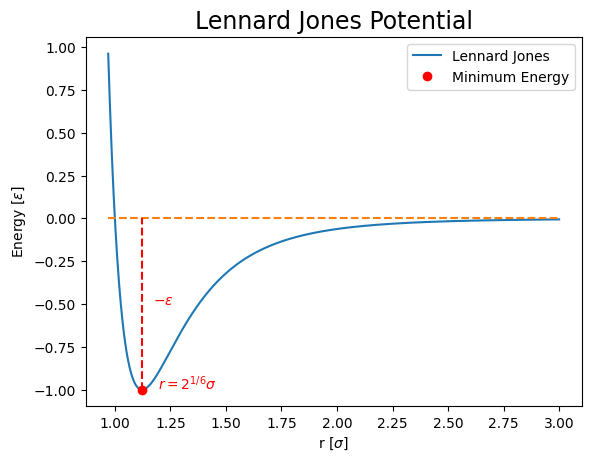

r_W = 2.05 Angstrom
V_LJ(6.0) = -0.647 kJ/mol


In [106]:
r_show = np.linspace(0.97,3, 1000)
r_min = 2 ** (1/6) # units of sigma

plt.plot(r_show, Leonard_Jones(r_show, 1, 1), label='Lennard Jones')
plt.xlabel(r'r $\left[\sigma \right]$')
plt.ylabel(r'Energy $\left[\epsilon \right]$')
plt.plot(r_min,-1, 'ro', label='Minimum Energy')
plt.plot(r_show, 0 * r_show, '--')
plt.title('Lennard Jones Potential', fontsize=17)
plt.vlines(r_min, -1, 0, colors='r', linestyles='dashed')

plt.text(r_min + 0.05, -1 /2 , r'$-\epsilon$', color='r', fontsize=10)
plt.text(r_min + 0.07, -1 , r'$r=2^{1/6} \sigma$', color='r', fontsize=10)

plt.legend()
plt.show()

# For Xenon
sigma = 4.10 # Angstrom
epsilon = 1.77 # kJ/mol
r_W = 1/2 * sigma
print(f"r_W = {r_W} Angstrom")
print(f"V_LJ(6.0) = {Leonard_Jones(6.0, epsilon, sigma):.3f} kJ/mol")

# NVT enssamble

## Phases

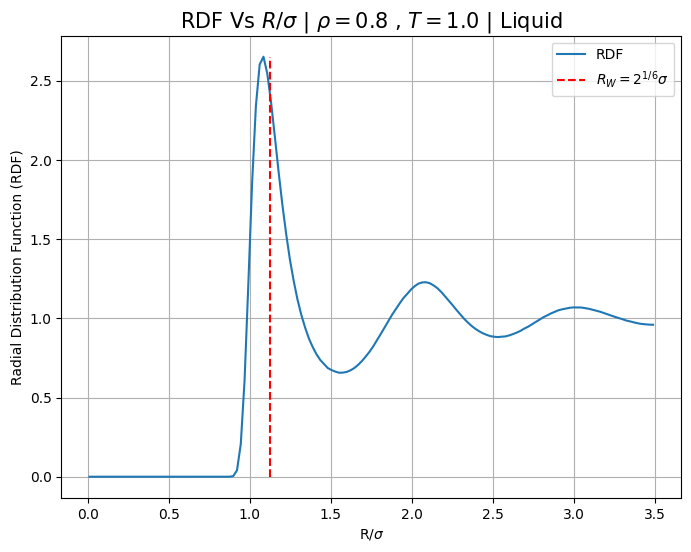

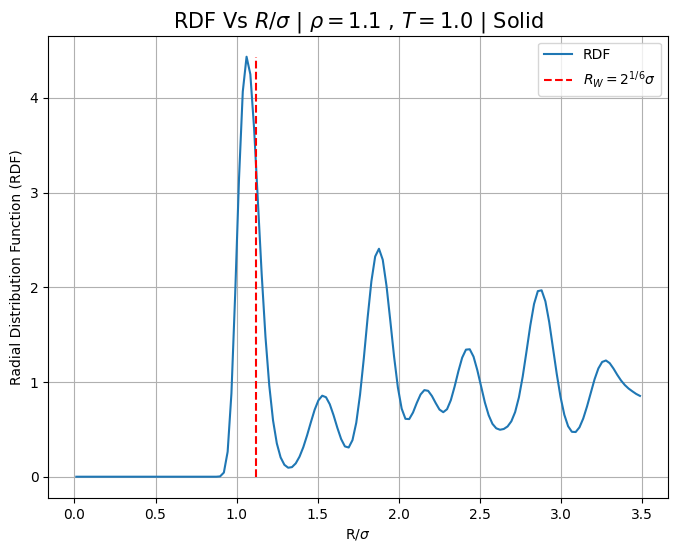

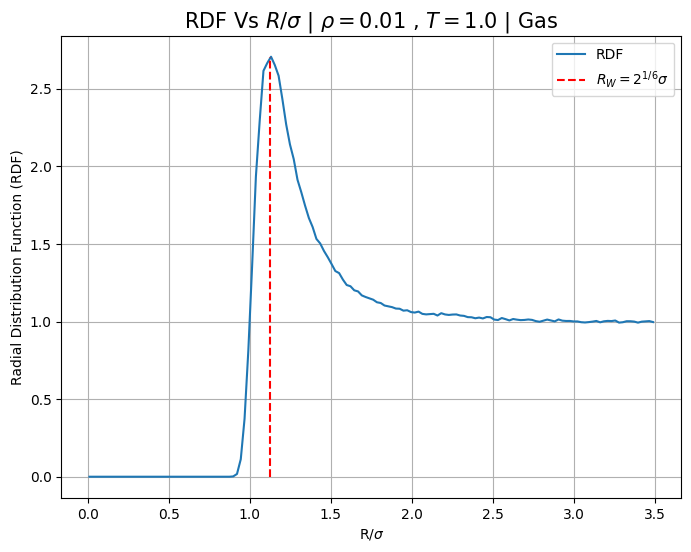

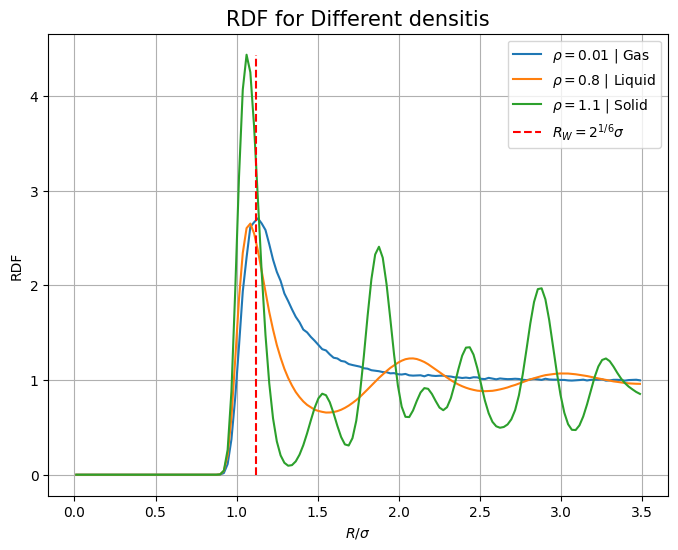

In [107]:
# Liquid
file_path_08 = os.path.join(results_folder, "rdf_lj_0.8.out")
_, __ = plot_rdf(file_path_08, r"RDF Vs $R/\sigma$ | $\rho = 0.8$ , $T = 1.0$ | Liquid")
# Solid
file_path_11 = os.path.join(results_folder, "rdf_lj_1.1.out")
_, __ = plot_rdf(file_path_11, r"RDF Vs $R/\sigma$ | $\rho = 1.1$ , $T = 1.0$ | Solid")
# Gas
file_path_001 = os.path.join(results_folder, "rdf_lj_0.01.out")
_, __ = plot_rdf(file_path_001, r"RDF Vs $R/\sigma$ | $\rho = 0.01$ , $T = 1.0$ | Gas")

density_list = [0.01,0.8,1.1]
phase_dict = {0.05: 'Gas', 0.8: 'Liquid', 1.1: 'Solid', 0.01: 'Gas'}
max_rdf = 0
plt.figure(figsize=(8, 6))
for density in density_list:
    file_path = os.path.join(results_folder, f"rdf_lj_{density}.out")
    R, RDF = plot_rdf(file_path, Plot=False)
    plt.plot(R, RDF, label=fr'$\rho= {density}$ | {phase_dict[density]}')
    max_rdf = max(max_rdf, max(RDF))
plt.vlines(2 ** (1/6), 0,max_rdf, colors='r', linestyles='dashed', label=r'$R_{W}= 2^{1/6} \sigma$')
plt.xlabel(r'$R/\sigma$')
plt.ylabel(r'RDF')
plt.title('RDF for Different densitis', fontsize=15)
plt.grid()
plt.legend()
plt.show()
    



## Cooling

### 

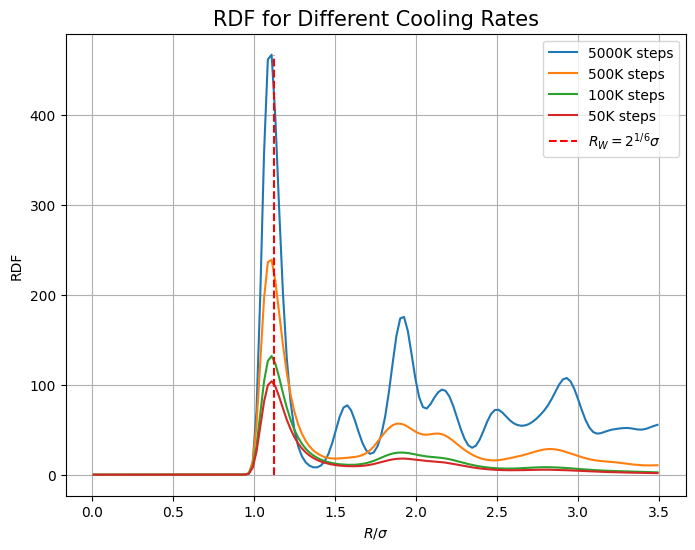

In [6]:
NumStep_list = [5000000,500000,100000,50000]
max_rdf = 0
plt.figure(figsize=(8, 6))
for NumStep in NumStep_list:
    file_path = os.path.join(results_folder, f"rdf_lj_relaxation_density_0.01_NumStep_{NumStep}.out")
    R, RDF = plot_rdf(file_path, Plot=False)
    plt.plot(R, RDF, label=f'{int(NumStep/1000)}K steps')
    max_rdf = max(max_rdf, max(RDF))
plt.vlines(2 ** (1/6), 0,max_rdf, colors='r', linestyles='dashed', label=r'$R_{W}= 2^{1/6} \sigma$')
plt.xlabel(r'$R/\sigma$')
plt.ylabel(r'RDF')
plt.title('RDF for Different Cooling Rates', fontsize=15)
plt.legend()
plt.grid()
plt.show()
    

## compact solid

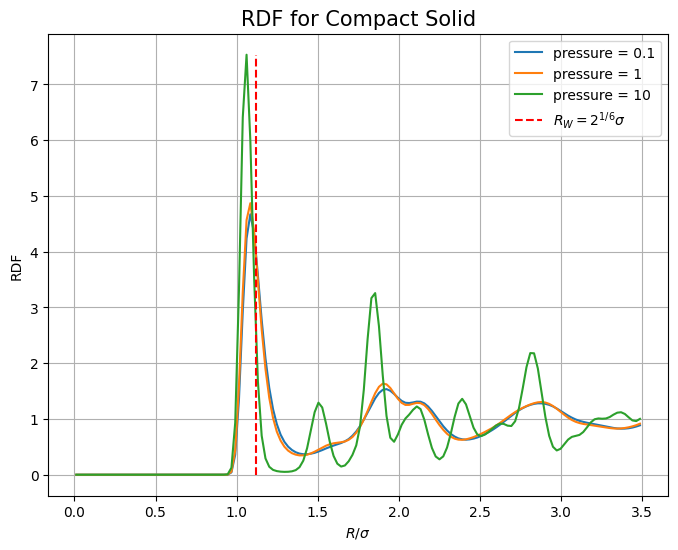

In [ ]:
pressure_list = [0.1,1,10]
max_rdf = 0
plt.figure(figsize=(8, 6))
for pressure in pressure_list:
    file_path = os.path.join(results_folder, f"rdf_lj_relaxation_pressure_{pressure}_NumStep_50000.out")
    R, RDF = plot_rdf(file_path, Plot=False)
    plt.plot(R, RDF, label=f'pressure = {pressure}')
    max_rdf = max(max_rdf, max(RDF))
plt.vlines(2 ** (1/6), 0,max_rdf, colors='r', linestyles='dashed', label=r'$R_{W}= 2^{1/6} \sigma$')
plt.xlabel(r'$R/\sigma$')
plt.ylabel(r'RDF')

plt.title('RDF for Compact Solid', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# Polymer Chain

Minimum of FENE potential: r = 0.960898 σ , V = 19.202574 ε


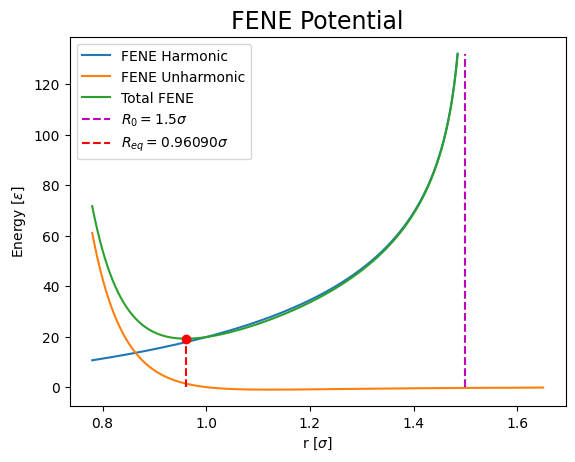

In [ ]:
%matplotlib inline
def FENE_harmonic(r,R0,k):
    return -0.5 * k * R0**2 * np.log(1 - (r/R0)**2)

def FENE_unharmonic(r,epsilon, sigma_F):
    return 4 * epsilon * ((sigma_F / r)**12 - (sigma_F / r)**6)

def FENE(r,R0,k,epsilon, sigma_F):
    return FENE_harmonic(r,R0,k) + FENE_unharmonic(r,epsilon, sigma_F)

k, R0, epsilon, sigma_F = 30, 1.5, 1.0, 1.0
r_show = np.linspace(0.78,0.99*R0, 1000)
r_show2 = np.linspace(0.78,1.1*R0, 1000)



# Find the minimum of the FENE potential
result = minimize_scalar(lambda x :FENE (x,R0,k,epsilon, sigma_F), bounds=(0.78, R0), method='bounded')
r_min = result.x
V_min = result.fun
print(f"Minimum of FENE potential: r = {r_min:.6f} σ , V = {V_min:.6f} ε")

V_FENE_harmonic = FENE_harmonic(r_show,R0,k)
V_FENE_unharmonic =FENE_unharmonic(r_show2,epsilon, sigma_F)
V_FENE_total = FENE(r_show,R0,k,epsilon, sigma_F)
plt.plot(r_show, V_FENE_harmonic, label='FENE Harmonic')
plt.plot(r_show2, V_FENE_unharmonic, label='FENE Unharmonic')
plt.plot(r_show, V_FENE_total, label='Total FENE')
plt.vlines(R0, 0, max(V_FENE_total), colors='m', linestyles='dashed', label=r'$R_{0} = 1.5 \sigma $')
plt.plot(r_min, V_min, 'ro')
plt.vlines(r_min, 0,  V_min, colors='r', linestyles='dashed', label=rf'$R_{{eq}}={r_min:.5f} \sigma$')
plt.xlabel(r'r $\left[\sigma \right]$')
plt.ylabel(r'Energy $\left[\epsilon \right]$')
plt.title('FENE Potential', fontsize=17)
plt.legend(loc='best')
plt.show()


## Radius  of gyration 

In [ ]:
number_of_monomers = 100
bond_length = r_min # LJ units, the equilibrium distance of the FENE potential 
Rg_analitical = bond_length * np.sqrt(number_of_monomers / 6)
print(f"Analytical Rg: {Rg_analitical:.3f} σ")

file_path = os.path.join(results_folder, "rg_chain_epsilon_1.dat")
avg_rg, err_rg = Calculate_RG(file_path)
print(f"Average Radius of Gyration: {avg_rg:.3f} ± {err_rg:.3f} σ")

Analytical Rg: 3.923 σ
Average Radius of Gyration: 7.322 ± 0.238 σ


In [56]:
def fit_and_calculate_chi_squared(x, y, y_err, fit_func):
    popt, pcov = curve_fit(fit_func, x, y, sigma=y_err, absolute_sigma=True)
    residuals = y - fit_func(x, *popt)
    chi_squared = np.sum((residuals / y_err) ** 2)
    reduced_chi_squared = chi_squared / (len(x) - len(popt))
    return popt, pcov, reduced_chi_squared

,epsilon,Rg,Error
0,0.01,5.958151,0.185878
1,0.03,6.610993,0.256264
2,0.05,7.321980,0.238472
3,0.10,6.996099,0.223717
4,0.30,5.489646,0.260110
5,0.50,3.561078,0.067697


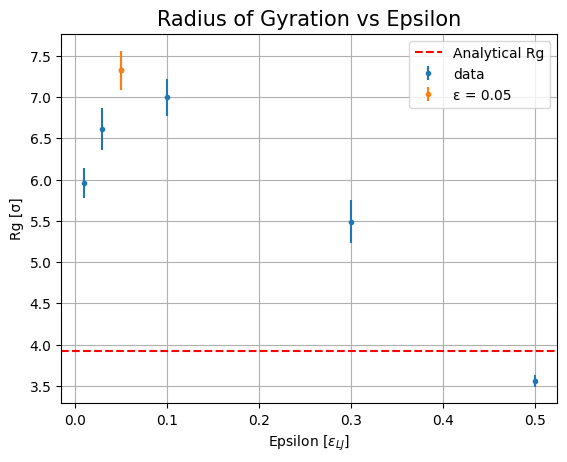

In [67]:
epsilon_list = [0.01,0.03,0.05,0.1,0.3,0.5]
Rg_dict = {'epsilon': epsilon_list, 'Rg': [], 'Error': []}
for epsilon in epsilon_list:
    file_path = os.path.join(results_folder, f"rg_chain_epsilon_{epsilon}.dat")
    avg_rg, err_rg = Calculate_RG(file_path)
    Rg_dict['Rg'].append(avg_rg)
    Rg_dict['Error'].append(err_rg)

Rg_df = pd.DataFrame(Rg_dict)
display(Rg_df)

popt, pcov, reduced_chi_squared = fit_and_calculate_chi_squared(
    Rg_df['epsilon'], Rg_df['Rg'], Rg_df['Error'], linear_fit)

plt.errorbar(Rg_df['epsilon'], Rg_df['Rg'], yerr=Rg_df['Error'], fmt='.', label=f'data')
plt.errorbar(0.05, Rg_df[Rg_df['epsilon'] == 0.05]['Rg'], yerr=Rg_df[Rg_df['epsilon'] == 0.05]['Error'], fmt='.', label=f'ε = {0.05}')
# plt.plot(Rg_df['epsilon'], linear_fit(Rg_df['epsilon'], *popt), '--', label='Linear Fit')
plt.xlabel('Epsilon [$ε_{LJ}$]')
plt.ylabel('Rg [σ]')
plt.title('Radius of Gyration vs Epsilon', fontsize=15)
plt.axhline(Rg_analitical, color='r', linestyle='--', label='Analytical Rg')
plt.legend(loc='best')
plt.grid()
plt.show()

# print(f"Reduced Chi-Squared: {reduced_chi_squared:.3f}")
# print(f"Slope: {popt[0]:.3f}, Intercept: {popt[1]:.3f}")
    

# Diffusion of Water Molecules

In [115]:
# Lodding the data
D_theo = 2.299 * 1E-9  # m^2/s  at T =25 C

mass_water = 18.01528 / Avogadro * 1e-3 # kg
T = 298.15 # K
VACF_initail = 3 * Boltzmann * T / mass_water * 1e-10  # Convert to Å^2/fs^2

# Define box boundaries
box_bounds = {'xlo': 0.02645, 'xhi': 35.53280, 'ylo': 0.02645, 'yhi': 35.53280, 'zlo': 0.02641, 'zhi': 35.47360}

# Read trajectory data
water_path = os.path.join(results_folder, "positions_water_dump10.lammpstrj")
water_df = read_lammpstrj(water_path)

# Select only oxygen atoms
oxygen_df = water_df[water_df['type'] == 1]
oxygen_df = oxygen_df.sort_values(by=['Timestep', 'id']).reset_index(drop=True)

# Remove the first timestep because it isn't in the steady state
if True:
    # Drop the first timestep and reset the timesteps
    oxygen_df = oxygen_df[oxygen_df['Timestep'] > 200].reset_index(drop=True)
    # Subtract the new first timestep value from all timestep values
    oxygen_df['Timestep'] -= oxygen_df['Timestep'].iloc[0]

In [116]:
# Compute MSD
MSD = compute_msd(oxygen_df, box_bounds)

# Perform the curve fitting
popt, pcov = curve_fit(linear_fit, MSD[MSD['Timestep'] > 0]['Timestep'], MSD[MSD['Timestep'] > 0]['MSD'])
D_sim_msd = popt[0] / 6 * 1e-5  # m^2/s
D_sim_msd_err = np.sqrt(np.diag(pcov))[0] / 6 * 1e-5  # m^2/s

# Compute VACF
VACF, timesteps= compute_VACF(oxygen_df)
D_vacf = Calculate_Diffusion_coefficient_from_VACF(VACF, timesteps)

mass_water = 18.01528 / Avogadro * 1e-3 # kg
T = 298.15 # K
VACF_initail = 3 * Boltzmann * T / mass_water * 1e-10  # Convert to Å^2/fs^2


In [12]:
# # Read trajectory data
# water_path = os.path.join(results_folder, "positions_water_dump100.lammpstrj")
# water_df = read_lammpstrj(water_path)

# # Select only oxygen atoms
# oxygen_df = water_df[water_df['type'] == 1]
# oxygen_df = oxygen_df.sort_values(by=['Timestep', 'id']).reset_index(drop=True)

# # Compute <V^2> for every timestep for oxygen atoms
# oxygen_df['V_squared'] = oxygen_df['vx']**2 + oxygen_df['vy']**2 + oxygen_df['vz']**2
# average_V_squared_oxygen = oxygen_df.groupby('Timestep')['V_squared'].mean()

# plt.plot(average_V_squared_oxygen.index, average_V_squared_oxygen, label=r'$\langle V^2 \rangle$')
# plt.hlines(VACF_initail, 0, max(average_V_squared_oxygen.index), colors='r', linestyles='dashed', label=r'$3K_{B} T / m$')
# plt.xlabel('Timestep')
# plt.ylabel(r'$\langle V^2 \rangle$')
# plt.title('Average Velocity Squared for Oxygen Atoms', fontsize=15)
# plt.legend()
# plt.show()

# # Remove the first timestep because it isn't in the steady state
# if True:
#     # Drop the first timestep and reset the timesteps
#     oxygen_df = oxygen_df[oxygen_df['Timestep'] > 200].reset_index(drop=True)
#     # Subtract the new first timestep value from all timestep values
#     oxygen_df['Timestep'] -= oxygen_df['Timestep'].iloc[0]

# # Compute <V^2> for every timestep for oxygen atoms
# oxygen_df['V_squared'] = oxygen_df['vx']**2 + oxygen_df['vy']**2 + oxygen_df['vz']**2
# average_V_squared_oxygen = oxygen_df.groupby('Timestep')['V_squared'].mean()

# plt.plot(average_V_squared_oxygen.index, average_V_squared_oxygen, label=r'$\langle V^2 \rangle$')
# plt.hlines(VACF_initail, 0, max(average_V_squared_oxygen.index), colors='r', linestyles='dashed', label=r'$3K_{B} T / m$')
# plt.xlabel('Timestep')
# plt.ylabel(r'$\langle V^2 \rangle$')
# plt.title('Average Velocity Squared for Oxygen Atoms', fontsize=15)
# plt.legend()
# plt.show()

Lit(exp) Diffusion Coefficient:	2.299e-09             m^2/s
MSD Diffusion Coefficient:	2.767e-09 ± 5.058e-12 m^2/s
VACF Diffusion Coefficient:	1.757e-09             m^2/s


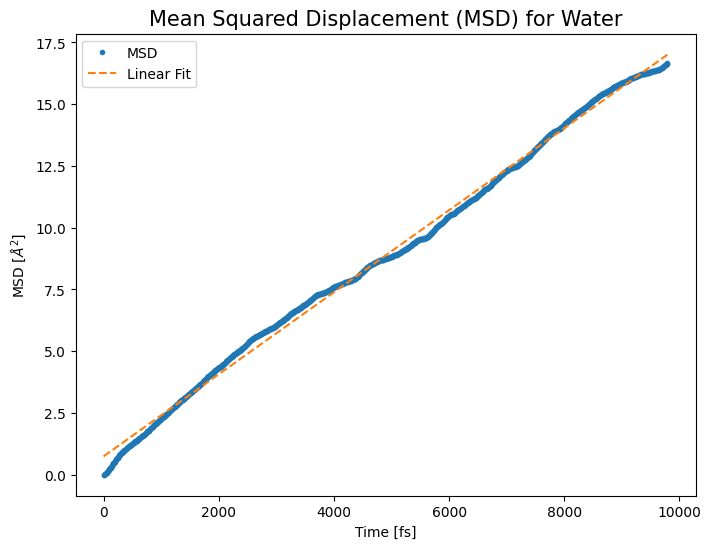

Fit Parameters:
a = 1.660e-03 ± 3.035e-06
b = 7.478e-01 ± 1.717e-02


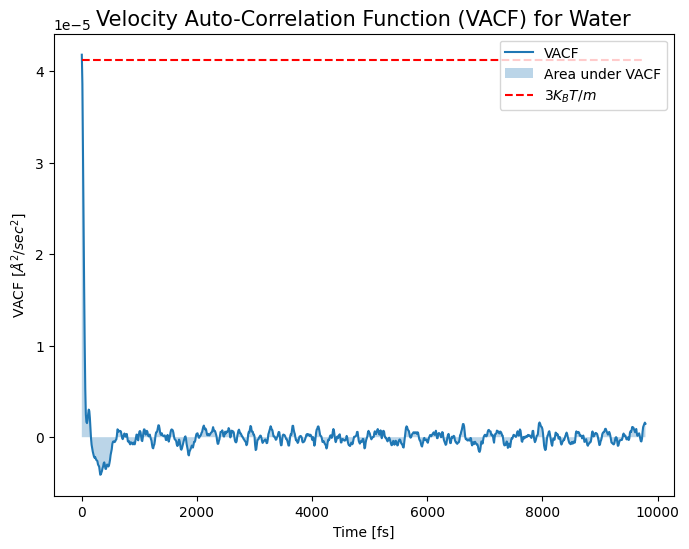

In [117]:
# Print Diffusion Coefficients
print(f"Lit(exp) Diffusion Coefficient:\t{D_theo:.3e}             m^2/s")
print(f"MSD Diffusion Coefficient:\t{D_sim_msd:.3e} ± {D_sim_msd_err:.3e} m^2/s")
print(f"VACF Diffusion Coefficient:\t{D_vacf:.3e}             m^2/s")

# Plot MSD
plt.figure(figsize=(8, 6))
plt.plot(MSD['Timestep'], MSD['MSD'],'.', label='MSD')
plt.plot(MSD['Timestep'], linear_fit(MSD['Timestep'], *popt), '--',label='Linear Fit')
plt.xlabel('Time [fs]')
plt.ylabel(r'MSD $[\AA^{2}]$')
plt.title('Mean Squared Displacement (MSD) for Water', fontsize=15)
plt.legend()
plt.show()

# print fit results
print('Fit Parameters:')
print(f"a = {popt[0]:.3e} ± {np.sqrt(np.diag(pcov))[0]:.3e}")
print(f"b = {popt[1]:.3e} ± {np.sqrt(np.diag(pcov))[1]:.3e}")

# plot the VACF
plt.figure(figsize=(8, 6))
plt.plot(timesteps, VACF, label='VACF')
plt.fill_between(timesteps, VACF, alpha=0.3, label='Area under VACF')

plt.hlines(VACF_initail, 0, max(timesteps), colors='r', linestyles='dashed', label=r'$3K_{B} T / m$')
plt.xlabel('Time [fs]')
plt.ylabel(r'VACF $[\AA^2 / sec^{2}]$')
plt.title('Velocity Auto-Correlation Function (VACF) for Water', fontsize=15)
plt.legend()
# plt.xlim(0, 200)
plt.show()